Veri Görselleştirme


Kategorik değişkenlerin görselleştirilmesi: sütun grafik, countplot bar
Sayisal degiskenlerin görselleştirilmesi: histogram, boxplot

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


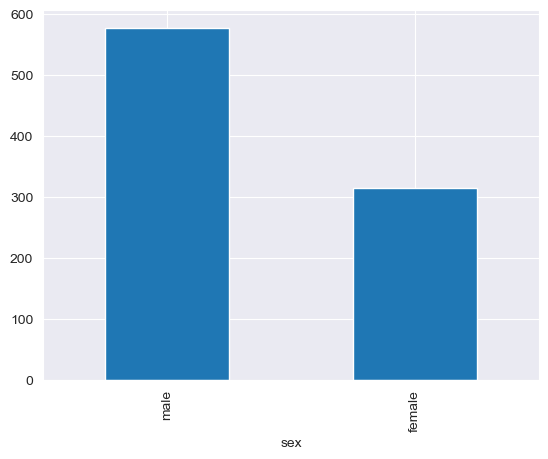

In [4]:
df["sex"].value_counts().plot(kind='bar')
plt.show()

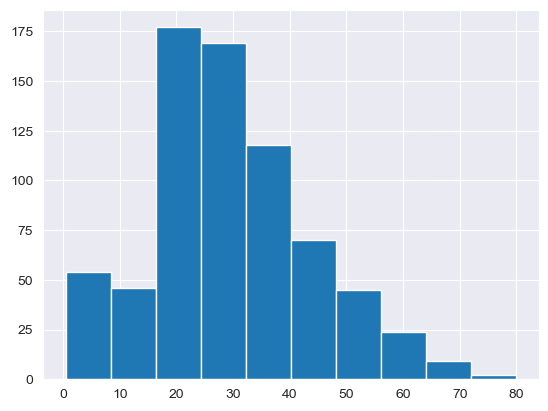

In [5]:
plt.hist(df["age"])
plt.show()

In [ ]:
plt.boxplot(df["fare"])
plt.show()

Kategorik değişkenleri belirleme
Tip bilgisine göre nümerik ama kategorik değişkenleri belirleme:

In [12]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category", "object", "bool"]]
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [13]:
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]
num_but_cat

['survived', 'pclass', 'sibsp', 'parch']

In [15]:
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["category", "object"]]
cat_but_car

[]

In [23]:
cat_cols = cat_cols + num_but_cat
cat_cols = [col for col in cat_cols if col not in cat_but_car]
print(df[cat_cols])
print("-----------------------------------------------------------------")
df[cat_cols].nunique()

        sex embarked   class    who  adult_male deck  embark_town alive  \
0      male        S   Third    man        True  NaN  Southampton    no   
1    female        C   First  woman       False    C    Cherbourg   yes   
2    female        S   Third  woman       False  NaN  Southampton   yes   
3    female        S   First  woman       False    C  Southampton   yes   
4      male        S   Third    man        True  NaN  Southampton    no   
..      ...      ...     ...    ...         ...  ...          ...   ...   
886    male        S  Second    man        True  NaN  Southampton    no   
887  female        S   First  woman       False    B  Southampton   yes   
888  female        S   Third  woman       False  NaN  Southampton    no   
889    male        C   First    man        True    C    Cherbourg   yes   
890    male        Q   Third    man        True  NaN   Queenstown    no   

     alone  survived  pclass  sibsp  parch  survived  pclass  sibsp  parch  \
0    False         0 

sex            2
embarked       3
class          3
who            3
adult_male     2
deck           7
embark_town    3
alive          2
alone          2
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
survived       2
pclass         3
sibsp          7
parch          7
dtype: int64

In [24]:
[col for col in df.columns if col not in cat_cols]

['age', 'fare']

Fonksiyon hali:

In [30]:
def cat_summary(dataframe, col_name):
     print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), end="\n\n\n")
     print("-----------------------------------------------------------------")



In [28]:
cat_summary(df, "sex")

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302




In [31]:
for col in cat_cols:
    cat_summary(df, col)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


-----------------------------------------------------------------
          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975


-----------------------------------------------------------------
        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


-----------------------------------------------------------------
       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376


-----------------------------------------------------------------
            adult_male     Ratio
adult_male                      
True               537  60.26936
False              354  39.73064


-----------------------------------------------------------------
      deck     Ratio
deck                
C       5

In [32]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}), end="\n\n\n")
    print("-----------------------------------------------------------------")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

        sex      Ratio
sex                   
male    577  64.758698
female  314  35.241302


-----------------------------------------------------------------


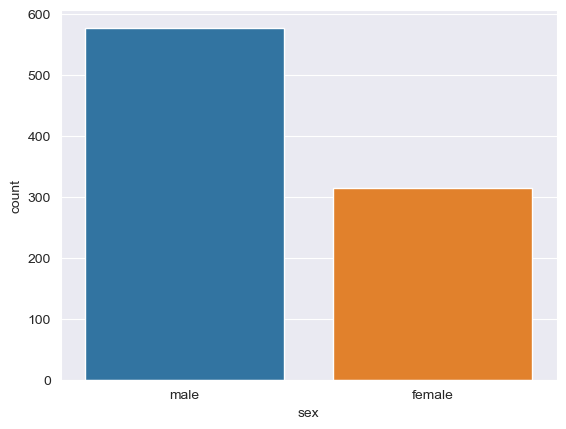

          embarked      Ratio
embarked                     
S              644  72.278339
C              168  18.855219
Q               77   8.641975


-----------------------------------------------------------------


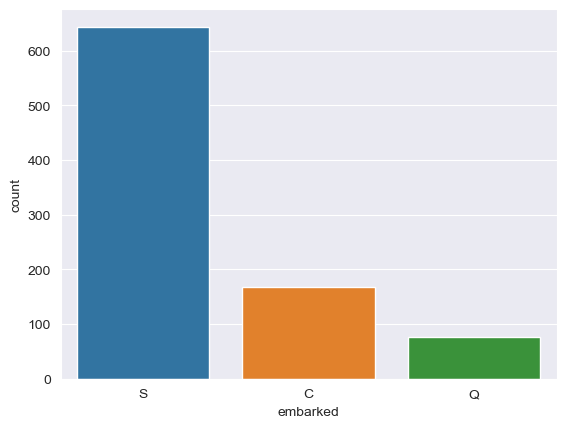

        class      Ratio
class                   
Third     491  55.106622
First     216  24.242424
Second    184  20.650954


-----------------------------------------------------------------


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


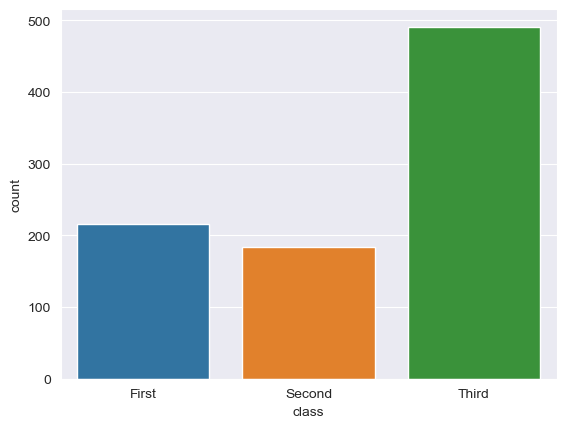

       who      Ratio
who                  
man    537  60.269360
woman  271  30.415264
child   83   9.315376


-----------------------------------------------------------------


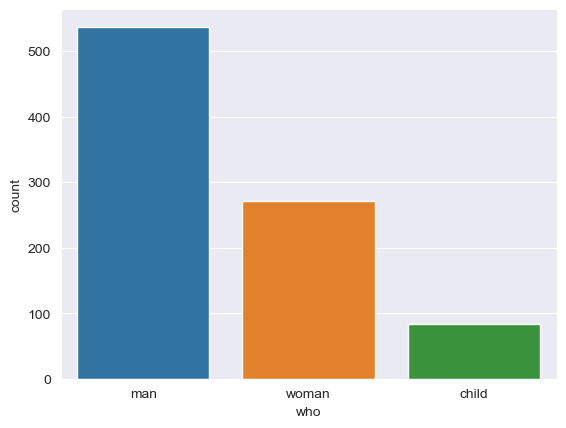

            adult_male     Ratio
adult_male                      
1                  537  60.26936
0                  354  39.73064


-----------------------------------------------------------------


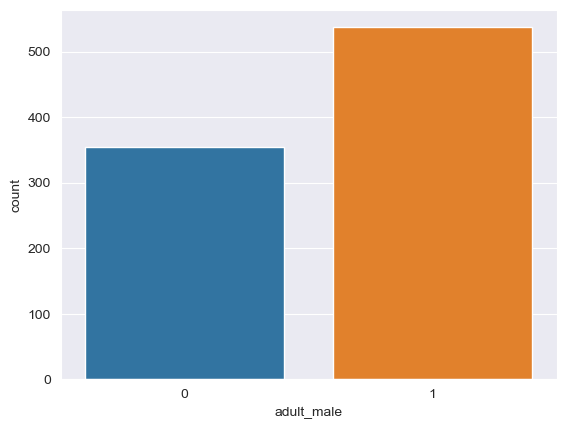

      deck     Ratio
deck                
C       59  6.621773
B       47  5.274972
D       33  3.703704
E       32  3.591470
A       15  1.683502
F       13  1.459035
G        4  0.448934


-----------------------------------------------------------------


/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


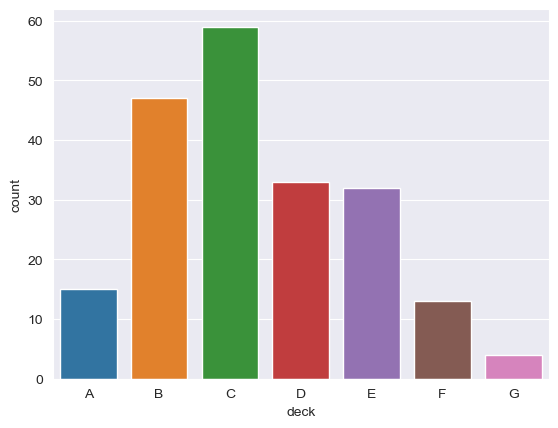

             embark_town      Ratio
embark_town                        
Southampton          644  72.278339
Cherbourg            168  18.855219
Queenstown            77   8.641975


-----------------------------------------------------------------


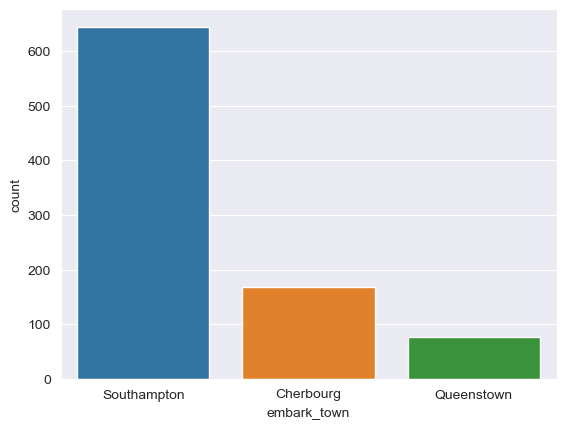

       alive      Ratio
alive                  
no       549  61.616162
yes      342  38.383838


-----------------------------------------------------------------


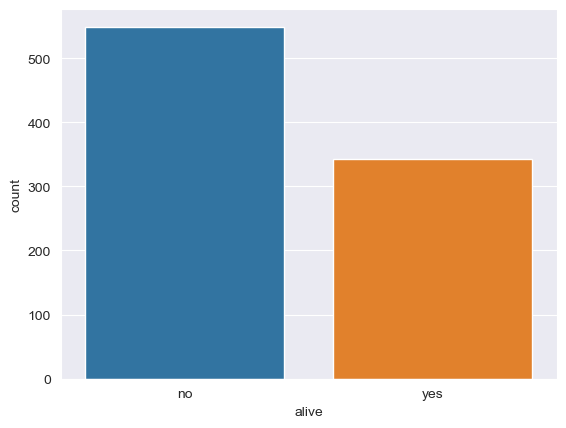

       alone     Ratio
alone                 
1        537  60.26936
0        354  39.73064


-----------------------------------------------------------------


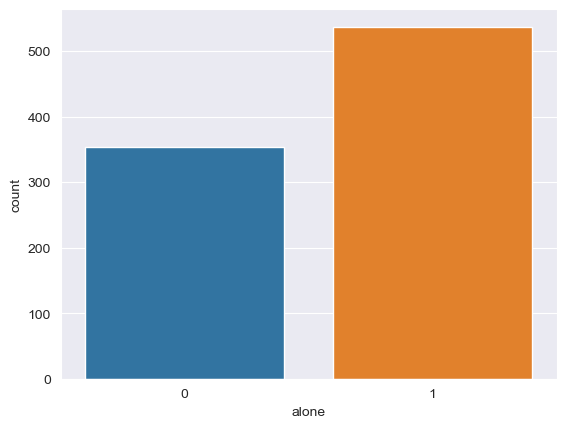

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


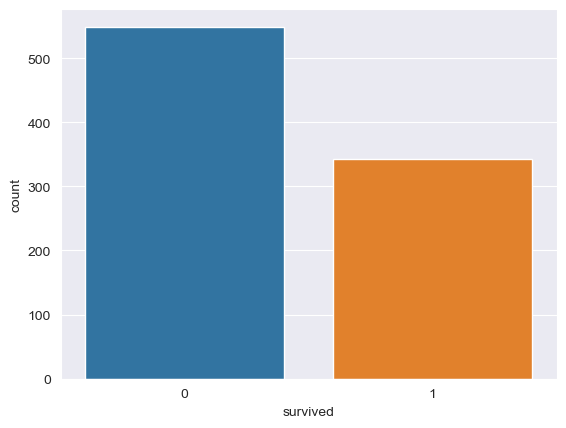

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


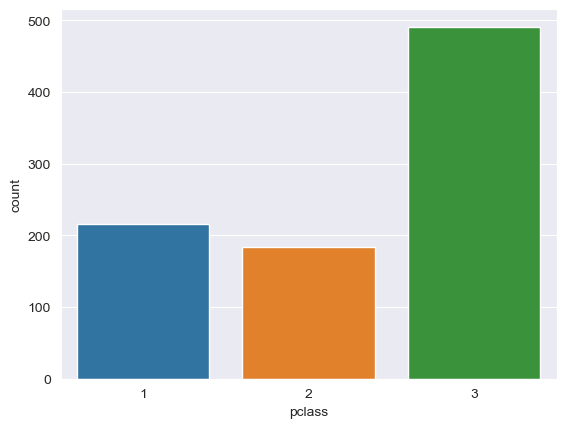

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


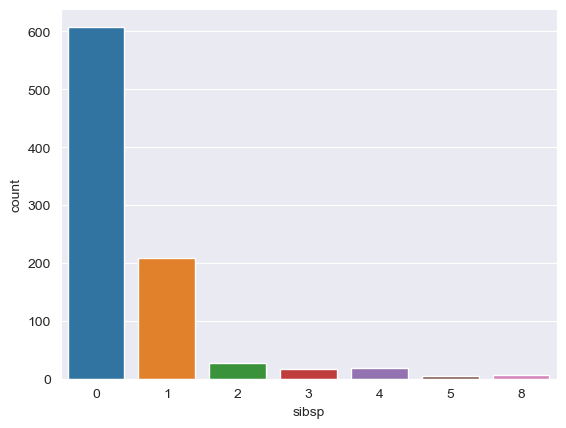

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


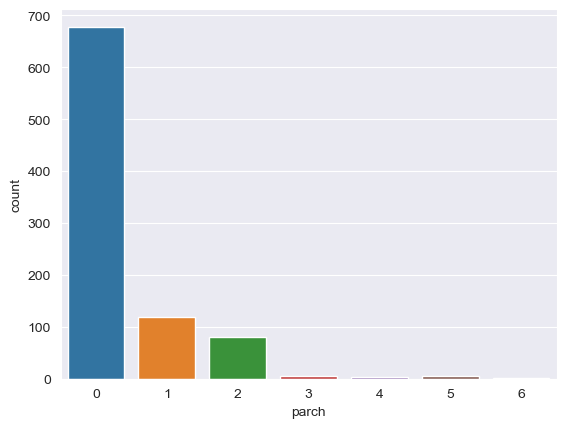

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


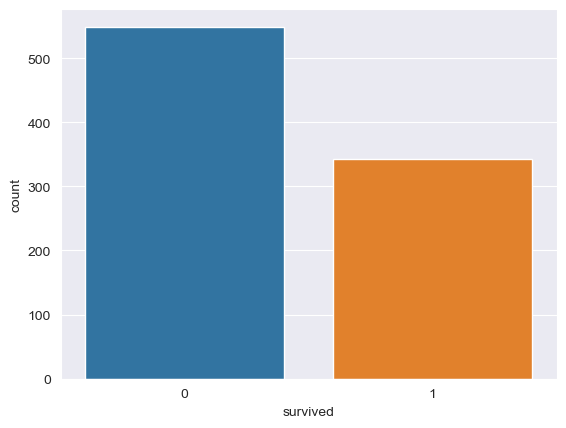

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


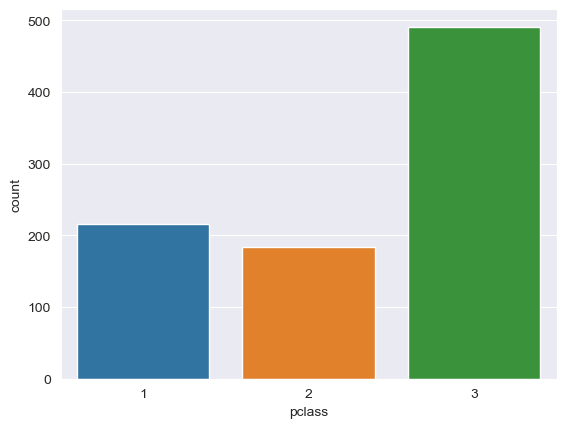

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


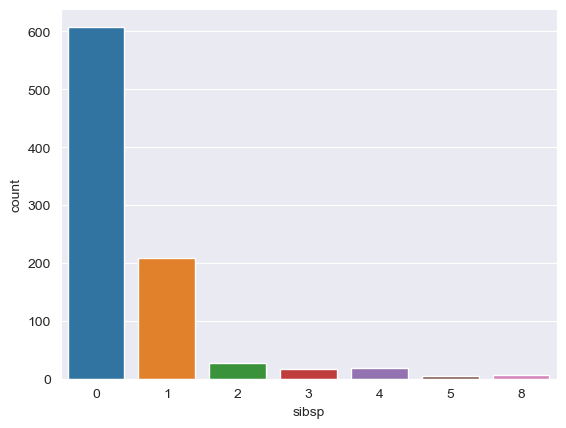

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


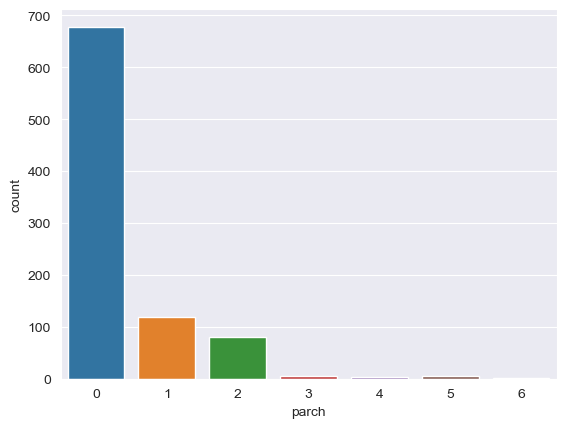

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


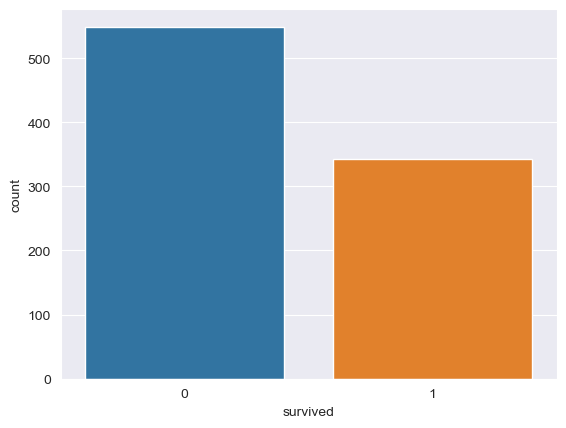

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


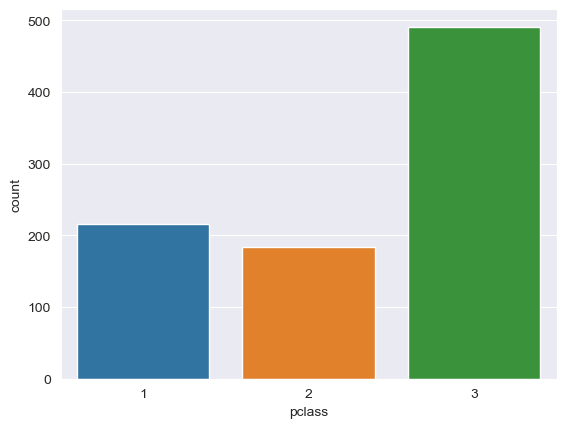

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


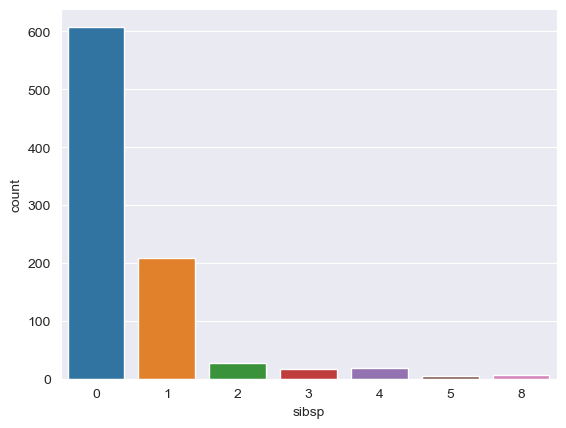

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


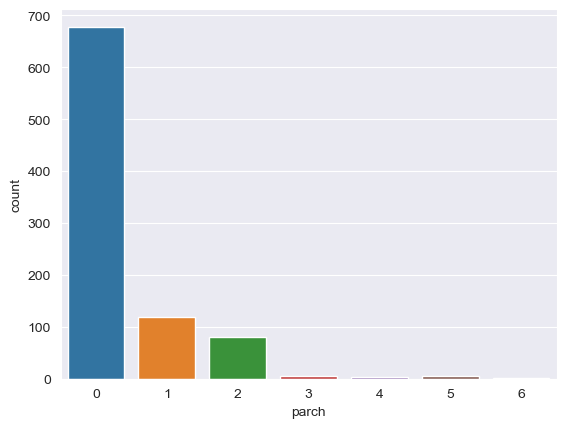

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


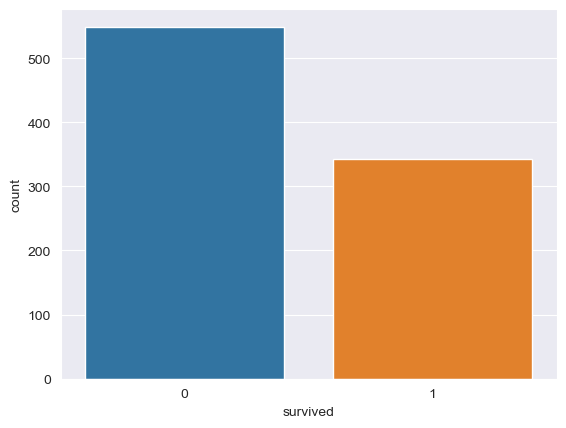

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


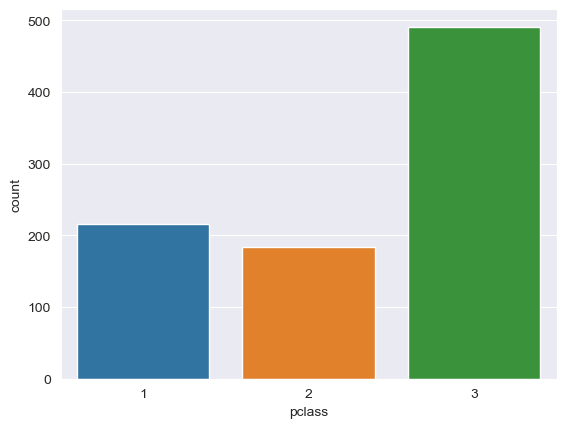

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


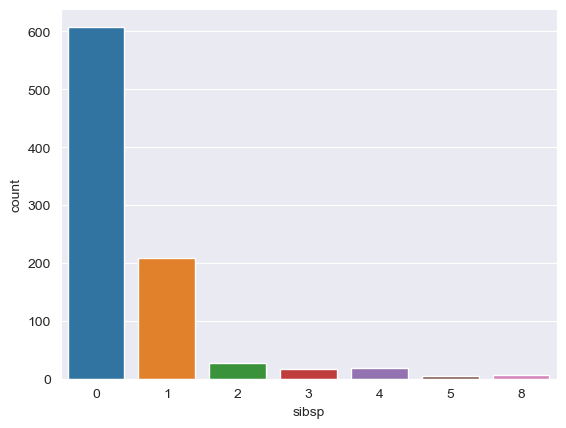

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


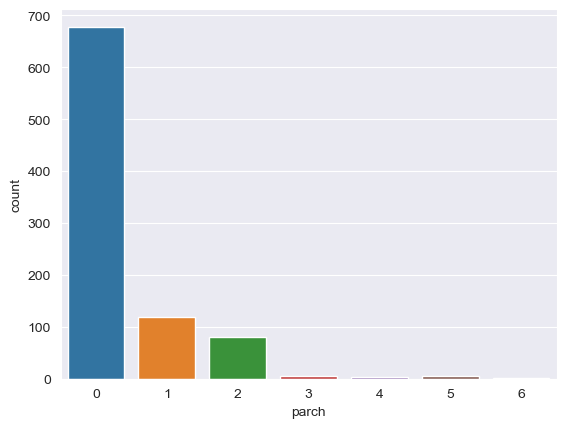

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


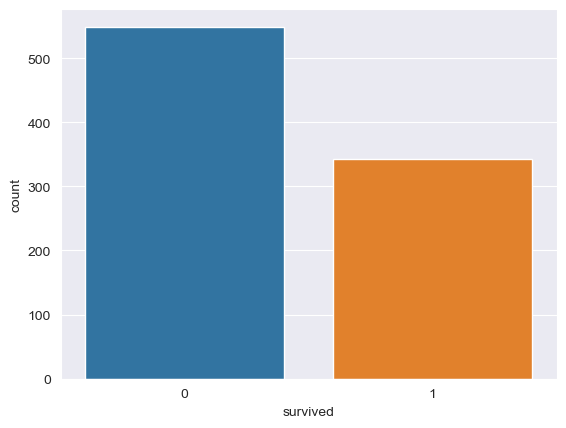

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


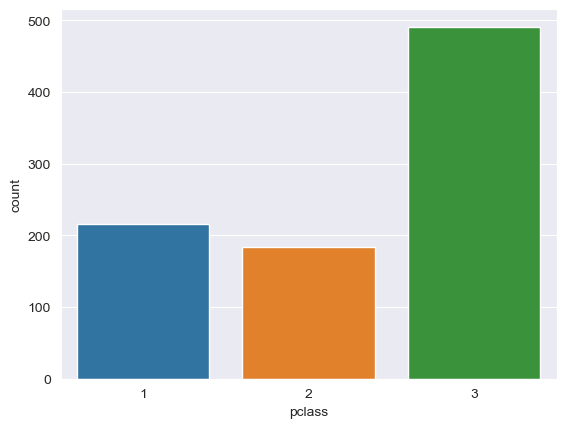

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


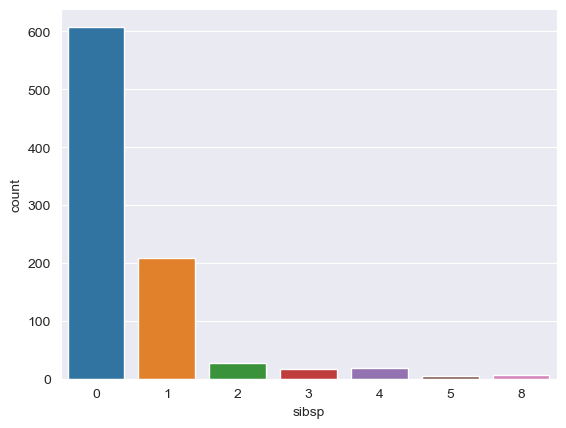

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


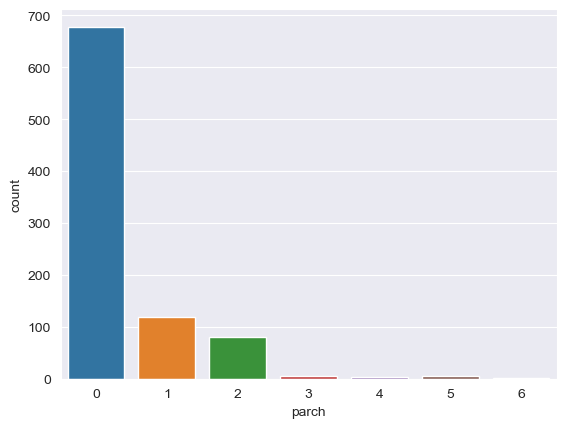

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


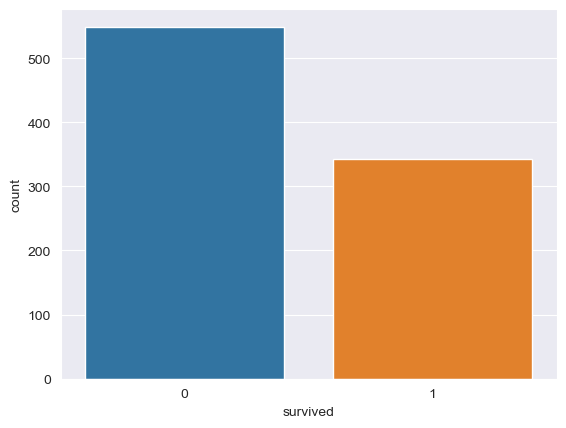

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


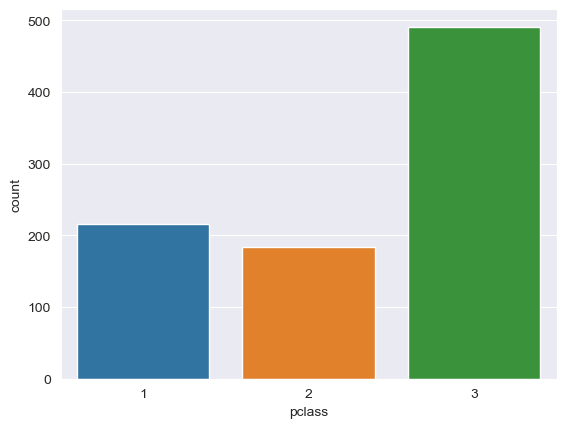

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


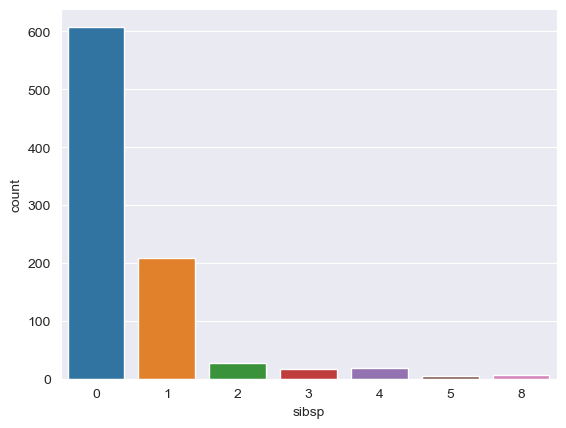

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


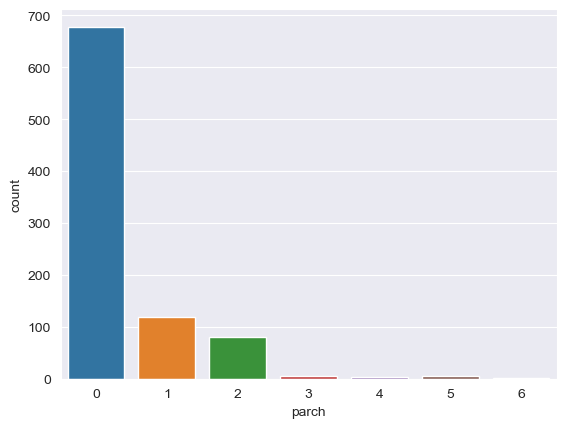

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


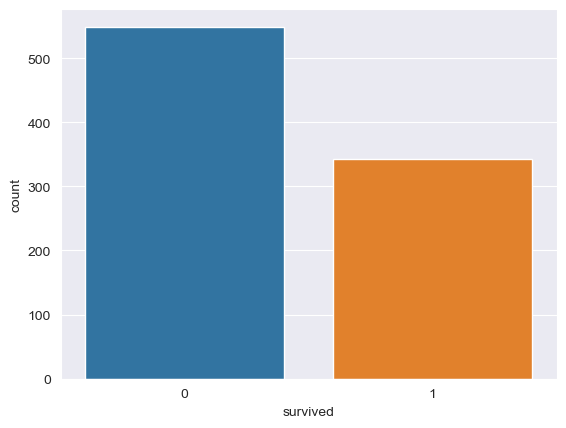

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


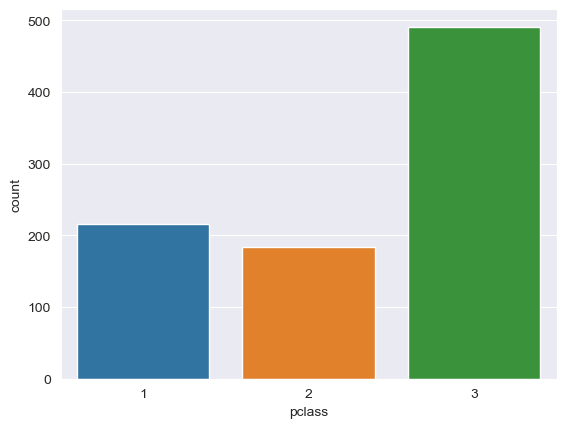

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


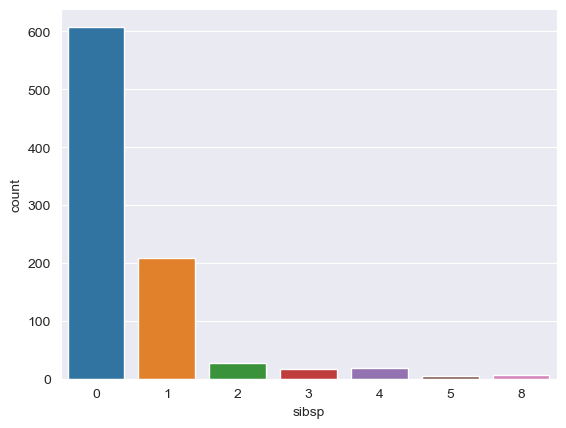

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


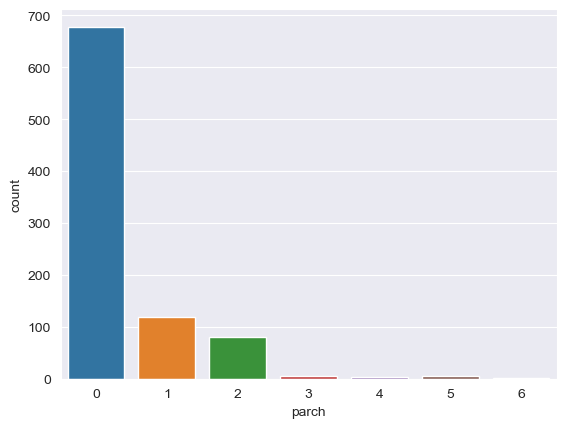

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


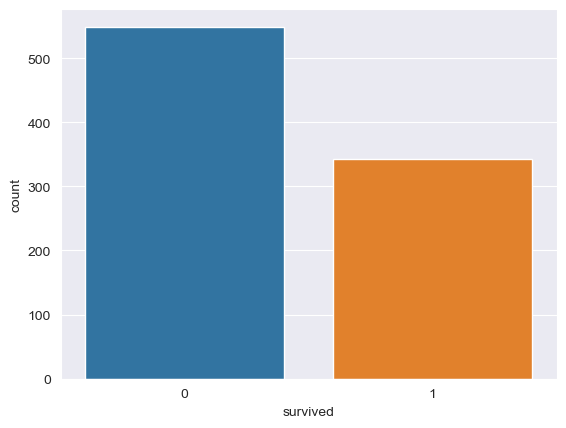

        pclass      Ratio
pclass                   
3          491  55.106622
1          216  24.242424
2          184  20.650954


-----------------------------------------------------------------


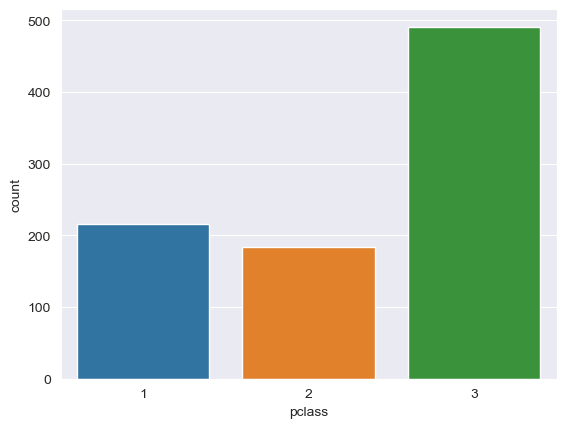

       sibsp      Ratio
sibsp                  
0        608  68.237935
1        209  23.456790
2         28   3.142536
4         18   2.020202
3         16   1.795735
8          7   0.785634
5          5   0.561167


-----------------------------------------------------------------


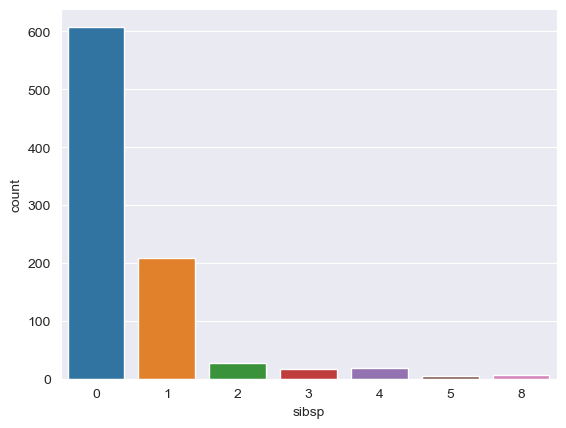

       parch      Ratio
parch                  
0        678  76.094276
1        118  13.243547
2         80   8.978676
5          5   0.561167
3          5   0.561167
4          4   0.448934
6          1   0.112233


-----------------------------------------------------------------


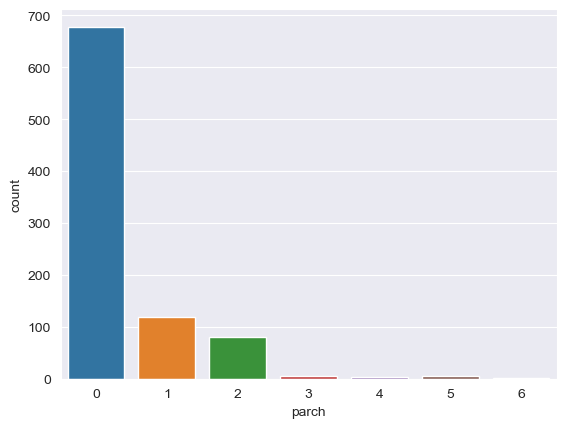

In [39]:
for col in cat_cols:
    if df[col].dtypes == "bool":
        df[col] = df[col].astype(int)
        cat_summary(df, col, plot=True)
    else:
        cat_summary(df, col, plot=True)

Nümerik değişkenler ile işlem:

In [41]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
num_cols

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'adult_male', 'alone']

In [43]:
num_cols = [col for col in num_cols if col not in cat_cols]
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[numerical_col].describe().T, end="\n\n\n")
    print("-----------------------------------------------------------------")
    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


-----------------------------------------------------------------


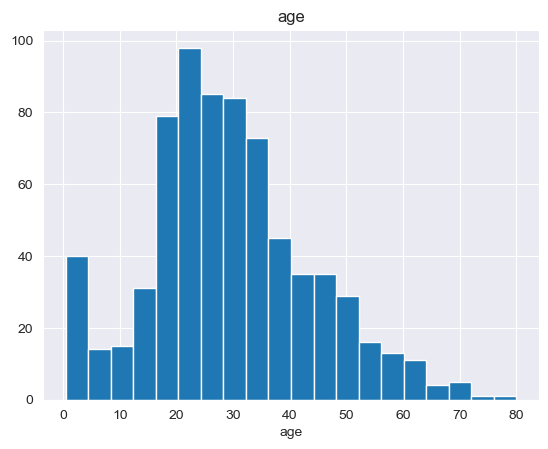

In [44]:
num_summary(df, "age", plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64


-----------------------------------------------------------------


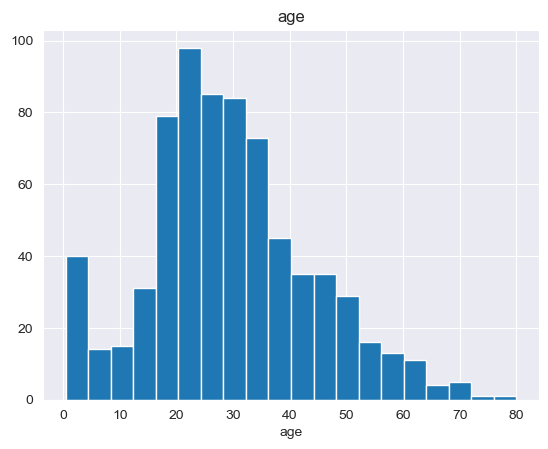

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


-----------------------------------------------------------------


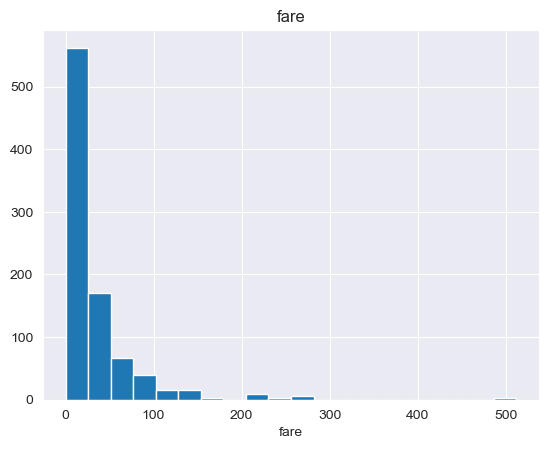

In [45]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [47]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["object", "bool", "category"]]

    num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and str(df[col].dtypes) in ["object", "category"]]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if df[col].dtypes in ["int", "float"]]
    num_cols = [col for col in df.columns if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [48]:
grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


(['sex',
  'embarked',
  'class',
  'who',
  'deck',
  'embark_town',
  'alive',
  'survived',
  'pclass',
  'sibsp',
  'parch',
  'adult_male',
  'alone'],
 ['age', 'fare'],
 [],
 ['survived', 'pclass', 'sibsp', 'parch', 'adult_male', 'alone'])

In [49]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 891
Variables: 15
cat_cols: 13
num_cols: 2
cat_but_car: 0
num_but_cat: 6


In [50]:
cat_summary(df, "survived")

          survived      Ratio
survived                     
0              549  61.616162
1              342  38.383838


-----------------------------------------------------------------


In [51]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    print("-----------------------------------------------------------------")

In [52]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


-----------------------------------------------------------------
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957


-----------------------------------------------------------------
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363


-----------------------------------------------------------------
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458


-----------------------------------------------------------------
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000


-----------------------------------------------------------------
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton  

/var/folders/0x/9__2t6h960980jt9l1z_bk700000gn/T/ipykernel_75550/2179816436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
/var/folders/0x/9__2t6h960980jt9l1z_bk700000gn/T/ipykernel_75550/2179816436.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")


In [53]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
    print("-----------------------------------------------------------------")

In [54]:
target_summary_with_num(df, "survived", "age")

                age
survived           
0         30.626179
1         28.343690


-----------------------------------------------------------------


In [55]:
for col in num_cols:
    target_summary_with_num(df, "survived", col)

                age
survived           
0         30.626179
1         28.343690


-----------------------------------------------------------------
               fare
survived           
0         22.117887
1         48.395408


-----------------------------------------------------------------
